Notebook 1: Data Wrangling
==========================

## Goals for learning
In this assignment, we will:

1) Explore some [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling) tasks that are needed to prepare data for machine learning applications
2) Get to know some of the [open data](https://en.wikipedia.org/wiki/Open_data) that we will be using this semester
3) Review some essential [Python](https://docs.python.org/3/tutorial/index.html) features and syntax
4) Practice thinking in the array-oriented programming paradigm
5) Introduce some of the data processing and machine learning libraries we will be using this semester

## Instructions
* Read through the notebook.
* Answer any plain text questions (replace cell content, "YOUR RESPONSE HERE", with your response).
* Insert your code within the code blocks marked with the comments "# START your code here" and "# STOP your code here".
* Do not use any "Generative AI" tools or assistants in the creation of your solutions.
* Run all cells to make sure your code works and you see reasonable results.

## Submission details
* Due: Monday 9/8, 11:59 PM
* [Submission instructions](https://www.cs.oswego.edu/~agraci2/csc461/submission_instructions.html)

## What is data wrangling?
> [Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.](https://en.wikipedia.org/wiki/Data_wrangling) 

**Data Wrangling** is an activity often performed by **data scientists** in preparation for data analytics or machine learning applications. As a machine learning programmer, you may be provided data sets that have undergone some degree of data wrangling already, however; not all data analysis and machine learning applications require the exact same type and degree of **cleaning** and **structuring**. Therefore, you may need to revisit certain data wrangling steps in order to transform your data to work with your specific applications. 

**Main takeaway: Data is not "one size fits all".**

## Notebook premise

For this notebook, imagine that you work for a large corporation, consisting of multiple teams that work on different products. The data scientists on a different team than the one you work on have some databases that they have been curating, using the following 6 data wrangling steps:

1) Data Discovery - [Discovery refers to the process of familiarizing yourself with data so you can conceptualize how you might use it.](https://online.hbs.edu/blog/post/data-wrangling)
2) Structuring - [Data structuring is the process of taking raw data and transforming it to be more readily leveraged. The form your data takes will depend on the analytical model you use to interpret it.](https://online.hbs.edu/blog/post/data-wrangling)
3) Cleaning - [Data cleaning is the process of removing inherent errors in data that might distort your analysis or render it less valuable. Cleaning can come in different forms, including deleting empty cells or rows, removing outliers, and standardizing inputs.](https://online.hbs.edu/blog/post/data-wrangling)
4) Enriching - [Once you understand your existing data and have transformed it into a more usable state, you must determine whether you have all of the data necessary for the project at hand. If not, you may choose to enrich or augment your data by incorporating values from other datasets.](https://online.hbs.edu/blog/post/data-wrangling)
5) Validating - [Data validation refers to the process of verifying that your data is both consistent and of a high enough quality.](https://online.hbs.edu/blog/post/data-wrangling)
6) Publishing - [This involves making it available to others within your organization for analysis.](https://online.hbs.edu/blog/post/data-wrangling)

Your team wants to leverage the work that has already been done by the other team by using these databases to train your ML models. Unfortunately, the transformations that have been applied to the data already are tailored to the other team's applications. 

You will have to revisit some, but not all, of these steps in order to make the data more appropriate for training your team's models. 

## Exercise 1: Tabular Data

### About the Python library dependencies
1) [NumPy](https://numpy.org/) - "NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems."
2) [Pandas](https://pandas.pydata.org/) - "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

### About the data set
The [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) is a Public Domain data repository provided by the UC Irvine.
It contains medical predictor variables that can be used to diagnostically predict whether or not a patient has diabetes.

Note: If you are running this lab on Indigo, I have cached the data in a read-only directory. If not, please download the data yourself from Brightspace or from the link above, and update the "DATASET_ROOT_DIR" path below accordingly.

In [1]:
import numpy as np
import pandas

# START your code here
df = pandas.read_csv('diabetes.csv')

DATASET_ROOT_DIR='/home/agraci2/data/'
# STOP your code here

# I have cached the database and made it readable (but not writeable) to all CS users.
# This line reads in the database from a CSV format, using the Pandas library:

# df = pandas.read_csv(DATASET_ROOT_DIR + 'pima/diabetes.csv')

### The "Data Discovery" Step Revisited

Although someone has already explored this data set, you will likely have to familiarize yourself with it if you want to use it for your ML application.

Use the cell below to display different properties of our dataframe and then answer the following questions.
The [Pandas Dataframe documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) is a great place to start.

In [3]:
# START your code here
pandas.set_option('display.max_columns',None)

print(df.head())
print('------------------------------------------------------------')
print("Shape: ",df.shape)
print("Size (axes): ",df.size)
# STOP your code here

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
------------------------------------------------------------
Shape:  (768, 9)
Size (axes):  6912


##### **Question:** What is the **shape** of this data?

##### **Question:** How many **axes** are there in this data?

##### **Question:** How many samples (entries/datum) are there in this data?

##### **Question:** How many **dimensions** (features) are there in this data?

### The "Cleaning" Step Revisited

Although some level of data cleaning has most likely already been applied to this data, we may need to do some additional processing, depending on our application.

#### Handling Missing Values

Imagine that we want to teach a model to **predict** diabetes in a patient, based in part on the patient's BMI, or ["Body Mass Index"](https://en.wikipedia.org/wiki/Body_mass_index). One task that we will likely want to complete before using this data is to transform the way **missing values** are encoded. Currently, if a value is missing, it is set to the **number zero (0)**. Based on what we know about BMIs, a value of zero should not make sense. This may work for some applications, however; in our case, it is likely to skew our results.

Use the cell below to compute the **mean** of the BMI column from the **unmodified** data. Do not use recursion or iteration, instead look at the [Pandas Dataframe functions](https://pandas.pydata.org/docs/reference/frame.html) that are available.

In [11]:
# START your code here
print('BMI Mean: ',df['BMI'].mean())
# STOP your code here

BMI Mean:  31.992578124999998


##### **Question:** Based on the unmodified data, what is the average (mean) BMI?

Another way to encode the **missing values** is to use the special value ["NaN" or "Not a Number"](https://en.wikipedia.org/wiki/NaN).
In the cell below, replace all zero values in the BMI column with "NaN", using [Numpy's NAN constant](https://numpy.org/doc/stable/reference/constants.html#numpy.NAN). Note: you may want to assign this to a new variable, rather than making modifications in-place.

Also use this cell to print out any values you need in order to answer the questions below. Here are some functions you might find helpful:
* [pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
* [pandas.DataFrame.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
* [pandas.DataFrame.notna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html)
* [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [14]:
bmi_with_nan = None

# START your code here
print(df['BMI'].isna().sum())
print('------------------------------------------------------------')


df['BMI-mod'] = df['BMI'].replace(0,np.NaN)
print(df['BMI-mod'].isna().sum())
print('------------------------------------------------------------')

print(df.head())
print('------------------------------------------------------------')

print("Modified BMI Mean with Na's: ",df['BMI-mod'].mean(0,False))
print("Modified BMI Mean without Na's: ",df['BMI-mod'].mean())

print('------------------------------------------------------------')

print("Count of Na's: ",df['BMI-mod'].isna().sum())
print("Count of non Na's: ",df['BMI-mod'].notna().sum())

# STOP your code here

0
------------------------------------------------------------
11
------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI-mod  
0                     0.627   50        1     33.6  
1                     0.351   31        0     26.6  
2                     0.672   32        1     23.3  
3                     0.167   21        0     28.1  
4                     2.288   33        1     43.1  
------------------------------------------------------------
Modified BMI Mean with Na's:  nan
Modified BMI Mean without N

##### **Question:** Based on the modified data, what is the average (mean) BMI, **without** skipping NaN values? Hint: Using the [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function, try setting the optional "skipna" parameter to "False".

##### **Question:** Based on the modified data, what is the average (mean) BMI, when skipping NaN values? Hint: Using the [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function, try setting the optional "skipna" parameter to "True", or leave it unassigned ("True" is the default value for this parameter).

##### **Question:** Based on the modified data, how many samples (entries/datum) have missing BMI values? How many have known BMI values?

#### Filtering Data
Perhaps (for whatever reason) your team would like to train your model using only the subset of data with patients who never had any pregnancies. 

Use the cell below to filter your data set to remove an entries where the number of pregnancies is greater than zero.

Implementation Hints:
* You may find the [Pandas where() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) to be of help in this task.
* Pay attention to what happens when the condition evaluates to false! The [Pandas dropna() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) may help.

In [19]:
# START your code here
df_noPreg = df.drop('BMI-mod',axis=1)

print('Patients with no pregnancies: ',(df_noPreg['Pregnancies']==0).sum())
print('Patients with pregnancies: ',(df_noPreg['Pregnancies']>0).sum())
print('------------------------------------------------------------')

df_noPreg = df_noPreg.where(df_noPreg['Pregnancies']==0)
print(df_noPreg.head())
print('------------------------------------------------------------\nREMOVED PATIENTS WITH PREGNANCIES\n')

print('(Mod Data) Patients with no pregnancies: ',(df_noPreg['Pregnancies']==0).sum())
print('(Mod Data) Patients with pregnancies: ',(df_noPreg['Pregnancies']>0).sum())
print("Shape: ",df_noPreg.shape)
print("Na's: ",df_noPreg.isna().sum())
print('------------------------------------------------------------\nDROPPED NA VALUES\n')

df_noPreg = df_noPreg.dropna()
print('(Mod Data) Patients with no pregnancies: ',(df_noPreg['Pregnancies']==0).sum())
print('(Mod Data) Patients with pregnancies: ',(df_noPreg['Pregnancies']>0).sum())
print("Shape: ",df_noPreg.shape)
print("Na's: ",df_noPreg.isna().sum())
# STOP your code here

Patients with no pregnancies:  111
Patients with pregnancies:  657
------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          NaN      NaN            NaN            NaN      NaN   NaN   
1          NaN      NaN            NaN            NaN      NaN   NaN   
2          NaN      NaN            NaN            NaN      NaN   NaN   
3          NaN      NaN            NaN            NaN      NaN   NaN   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                       NaN   NaN      NaN  
1                       NaN   NaN      NaN  
2                       NaN   NaN      NaN  
3                       NaN   NaN      NaN  
4                     2.288  33.0      1.0  
------------------------------------------------------------
REMOVED PATIENTS WITH PREGNANCIES

(Mod Data) Patients with no pregnancies:  111
(Mod Data) Patients with pr

##### **Question:** Based on the modified data, how many samples (entries/datum) are left after filtering out any patients with a history of pregnancy?

In [ ]:
111 patients

## Exercise 2: Image Data
### Python library dependencies
* [Pytorch](https://pytorch.org/) - "PyTorch is an optimized tensor library for deep learning using GPUs and CPUs." 
    * Note: At the moment, we will only be using Pytorch for its Torchvision package (see below).
* [Torchvision](https://pytorch.org/vision/stable/index.html) - "The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision." 
    * Note: we will be using this package to access the MNIST dataset.

### About the data set
The [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) is a large set of handwritten digits (labeled 0-9), formatted as 28x28 pixel grayscale images. 

Although the database is available for download in binary format from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/), we will be using the Torchvision API to retrieve and load the data for us in this notebook.

Note: If you are running this lab on Moxie, I have cached the data for you already. If not, please update the URI in the 'else' clause below to where you would like the data cached, and run. If you are downloading the data for yourself, please make sure to clean up any intermediate files that may have been downloaded before zipping up your assignment, or else the archive will be larger than necessary.

In [6]:
import os
import torchvision

# I have already installed and cached this data set to the following location
if os.path.exists(DATASET_ROOT_DIR + 'mnist.npz'):
    
    # Load the cached intermediate format
    cached = np.load(DATASET_ROOT_DIR + 'mnist.npz')
    
    # For this notebook, we will just be looking at the training image data
    training_images = cached['training_images']
    
# I am providing the "else" case just so that you can see how Torchvision can be used to download the data
else:
    
    # Ask Torchvision to download the data for us
    data_training = torchvision.datasets.MNIST('mnist', train=True, transform=None, target_transform=None, download=True)
    data_evaluation = torchvision.datasets.MNIST('mnist', train=False, transform=None, target_transform=None, download=True)
    print("Downloading the MNIST data set. Please clean up any intermediate files in your notebook directory.")
    
    # For this notebook, we will just be looking at the training image data
    training_images = data_training.data.numpy()
    
    # Save the data in an intermediate NumPy "npz" format
    np.savez("mnist.npz", 
             training_images=data_training.data.numpy(), 
             training_labels=data_training.targets.numpy(), 
             evaluation_images=data_evaluation.data.numpy(), 
             evaluation_labels=data_evaluation.targets.numpy())
    print("MNIST download complete.")

### The "Data Discovery" Step Revisited

Just like with the tabular data above, you will need to familiarize yourself with the image data set as well if you want to use it for your ML application.

Use the cell below to display different properties of our data and then answer the following questions.
The [NumPy N-dimensional array documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) is a great place to start.

In [16]:
# START your code here
print("Shape: ",training_images.shape)
print("Number of dimensions: ",training_images.ndim)
print("Size: ",training_images.size)
# STOP your code here

Shape:  (60000, 28, 28)
Number of dimensions:  3
Size:  47040000


##### **Question:** What is the **shape** of the training image data?

##### **Question:** How many **axes** are there in the training image data?

##### **Question:** How many samples (entries/datum) are there in the training image data?

##### **Question:** If we consider each **pixel** in an image to be a separate feature, how many **dimensions** (features) are there in this data?

### The "Cleaning" Step Revisited

Currently, the images are encoded using grayscale values (0-255). In the cell below, we use the [Matplotlib](https://matplotlib.org/) visualization library to plot/render our first training sample in grayscale.

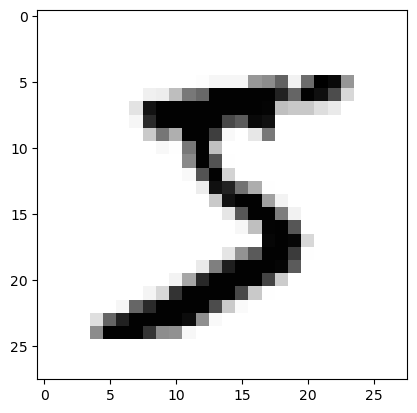

In [18]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap='Greys')

Imagine that for your model, you need to train it on images that have only black and white pixels.

One technique that you can use to accomplish the required transformation is called **thresholding**. Given the scalar value "threshold", create an N-dimensional array of booleans that indicates whether or not each pixel is **greater than or equal to** the threshold.
* True: the pixel is at or over the threshold value
* False: the pixel is below the threshold value

Hint: look into the NumPy N-dimensional array [greater than or equal to (ge) operator](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.__ge__.html).

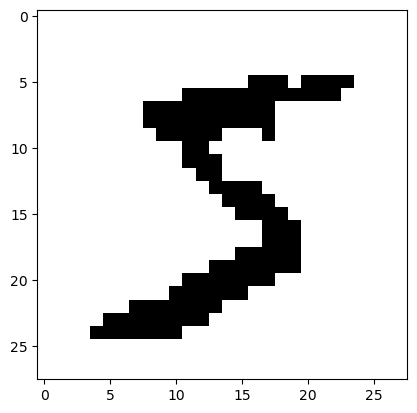

In [20]:
threshold=100
thresholded_images = None

# START your code here
thresholded_images = training_images.__ge__(threshold)
# STOP your code here

plt.imshow(thresholded_images[0], cmap='Greys')

## Conclusion

We will be seeing these datasets again throughout the semester, as well as some others. There are also many more ways we will want to explore and transform our data going forward. For now, you should have a better feel for how we will be accessing, loading, modifying, and working with data in this course.

##### Congratulations, you have reached the end of this notebook!